importing important libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import f1_score, accuracy_score
import pickle

Loading  dataset  in csv format 

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Understanding dataset

In [3]:
df.shape

(2200, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Data prerocessing

In [7]:
#Checking duplicates
df.duplicated().sum()

0

Deleting  seven unwanted rows 

In [8]:
df.drop(df.index[200:300], inplace=True)
df.drop(df.index[600:700], inplace=True)
df.drop(df.index[1800:1900], inplace=True)
df.drop(df.index[400:600], inplace=True)
df.drop(df.index[500:600], inplace=True)
df.drop(df.index[900:1000], inplace=True)

In [9]:
pd.unique(df.label)

array(['rice', 'maize', 'kidneybeans', 'pigeonpeas', 'lentil', 'banana',
       'mango', 'grapes', 'watermelon', 'apple', 'orange', 'papaya',
       'coconut', 'cotton', 'coffee'], dtype=object)

Checking for outliers

C:\Users\G.O.A.T\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N'>

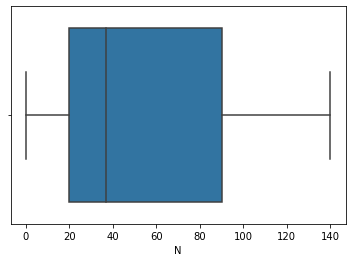

In [10]:
sns.boxplot(df.N)

C:\Users\G.O.A.T\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P'>

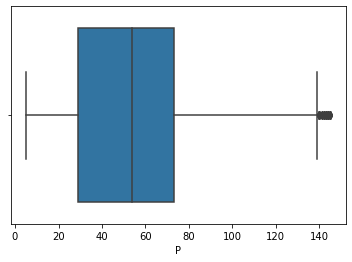

In [11]:
sns.boxplot(df.P)

C:\Users\G.O.A.T\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K'>

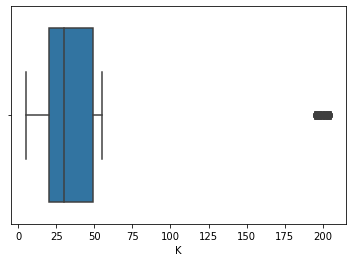

In [12]:
sns.boxplot(df.K)

C:\Users\G.O.A.T\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rainfall'>

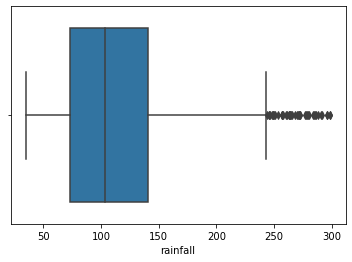

In [13]:
sns.boxplot(df.rainfall)

C:\Users\G.O.A.T\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='humidity'>

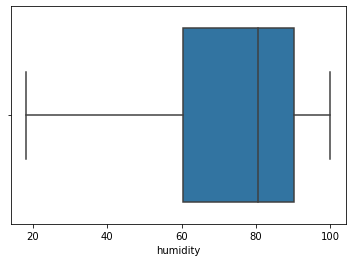

In [14]:
sns.boxplot(df.humidity)

C:\Users\G.O.A.T\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph'>

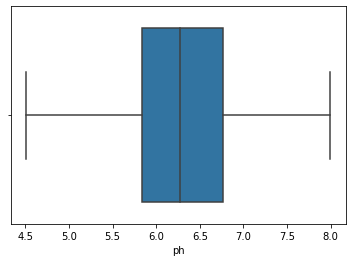

In [15]:
sns.boxplot(df.ph)

C:\Users\G.O.A.T\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temperature'>

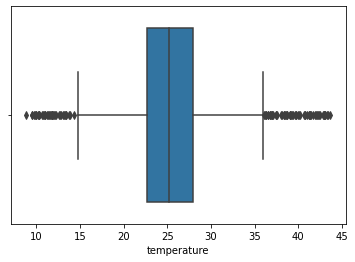

In [16]:
sns.boxplot(df.temperature)

C:\Users\G.O.A.T\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='humidity'>

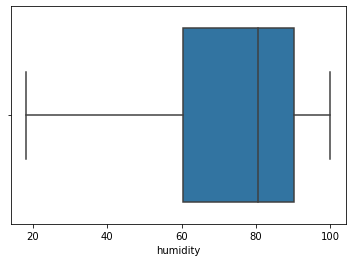

In [17]:
sns.boxplot(df.humidity)

C:\Users\G.O.A.T\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N'>

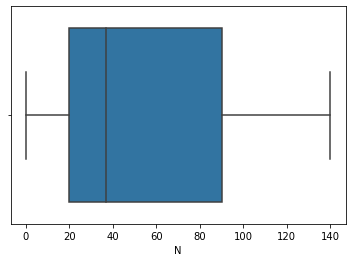

In [18]:
sns.boxplot(df.N)

Extracting cleaned data 

In [19]:
df.to_csv("clean9.csv")

Loading cleaned data

In [20]:
df2 =pd.read_csv("clean9.csv")
df2

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...,...
1495,2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
1496,2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
1497,2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
1498,2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [21]:
df2.duplicated().sum()


0

In [22]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1500.0,1169.500000,653.236350,0.000000,474.750000,1249.500000,1724.250000,2199.000000
N,1500.0,52.800667,38.922439,0.000000,20.000000,37.000000,90.000000,140.000000
P,1500.0,57.340000,36.822932,5.000000,29.000000,54.000000,73.000000,145.000000
K,1500.0,52.649333,59.168000,5.000000,20.000000,30.000000,49.000000,205.000000
temperature,1500.0,25.502080,5.412405,8.825675,22.638884,25.242051,28.000718,43.675493
humidity,1500.0,72.656781,20.608531,18.092240,60.488157,80.579099,90.271928,99.981876
ph,1500.0,6.318784,0.662620,4.507524,5.842023,6.275920,6.762141,7.995849
rainfall,1500.0,114.776267,54.823843,35.034848,73.058679,103.614292,141.137227,298.560117


Data Visualization

In [23]:
# sns.set_style("whitegrid")

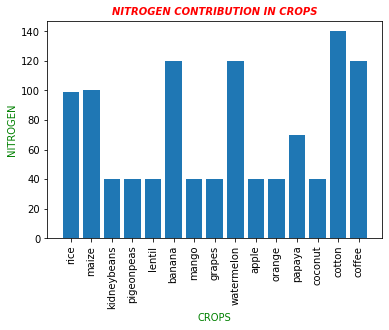

In [24]:
# plt.figure(figsize=(5,3), dpi=300)
plt.bar(df2.label,df2.N)
plt.xlabel("CROPS", fontdict={"color":"green", "fontsize":10})
plt.ylabel("NITROGEN", fontdict={"color":"green", "fontsize":10})
plt.title("NITROGEN CONTRIBUTION IN CROPS", fontdict={"color":"red", "fontweight":"bold","fontstyle":"italic", "fontsize":10})
plt.xticks(rotation=90)
plt.show()

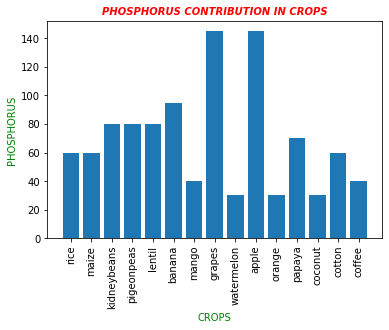

In [25]:
#plt.figure(figsize=(5,3), dpi=300)
plt.bar(df2.label,df2.P)
plt.xlabel("CROPS", fontdict={"color":"green", "fontsize":10})
plt.ylabel("PHOSPHORUS", fontdict={"color":"green", "fontsize":10})
plt.title("PHOSPHORUS CONTRIBUTION IN CROPS", fontdict={"color":"red", "fontweight":"bold","fontstyle":"italic", "fontsize":10})
plt.xticks(rotation=90)
plt.show()

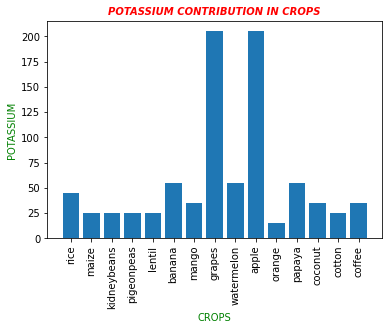

In [26]:
#plt.figure(figsize=(5,3), dpi=300)
plt.bar(df2.label,df2.K)
plt.xlabel("CROPS", fontdict={"color":"green", "fontsize":10})
plt.ylabel("POTASSIUM", fontdict={"color":"green", "fontsize":10})
plt.title("POTASSIUM CONTRIBUTION IN CROPS", fontdict={"color":"red", "fontweight":"bold","fontstyle":"italic", "fontsize":10})
plt.xticks(rotation=90)
plt.show()

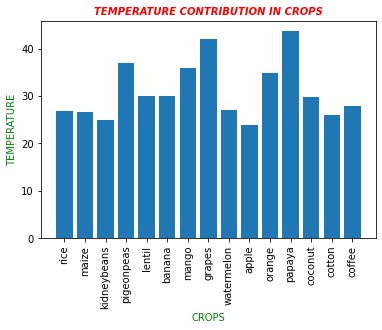

In [27]:
#plt.figure(figsize=(5,3), dpi=300)
plt.bar(df2.label,df2.temperature)
plt.xlabel("CROPS", fontdict={"color":"green", "fontsize":10})
plt.ylabel("TEMPERATURE", fontdict={"color":"green", "fontsize":10})
plt.title("TEMPERATURE CONTRIBUTION IN CROPS", fontdict={"color":"red", "fontweight":"bold","fontstyle":"italic", "fontsize":10})
plt.xticks(rotation=90)
plt.show()

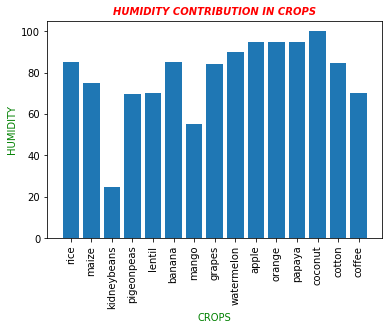

In [28]:
#plt.figure(figsize=(5,3), dpi=300)
plt.bar(df2.label,df2.humidity)
plt.xlabel("CROPS", fontdict={"color":"green", "fontsize":10})
plt.ylabel("HUMIDITY", fontdict={"color":"green", "fontsize":10})
plt.title("HUMIDITY CONTRIBUTION IN CROPS", fontdict={"color":"red", "fontweight":"bold","fontstyle":"italic", "fontsize":10})
plt.xticks(rotation=90)
plt.show()

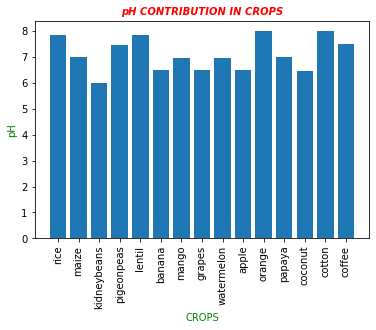

In [29]:
#plt.figure(figsize=(5,3), dpi=300)
plt.bar(df2.label,df2.ph)
plt.xlabel("CROPS", fontdict={"color":"green", "fontsize":10})
plt.ylabel("pH", fontdict={"color":"green", "fontsize":10})
plt.title("pH CONTRIBUTION IN CROPS", fontdict={"color":"red", "fontweight":"bold","fontstyle":"italic", "fontsize":10})
plt.xticks(rotation=90)
plt.show()

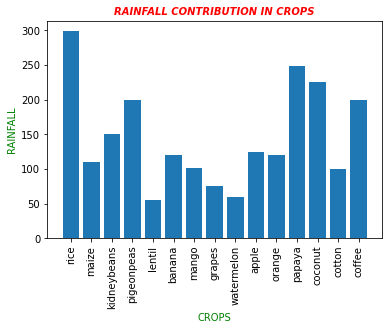

In [30]:
#plt.figure(figsize=(5,3), dpi=300)
plt.bar(df2.label,df2.rainfall)
plt.xlabel("CROPS", fontdict={"color":"green", "fontsize":10})
plt.ylabel("RAINFALL", fontdict={"color":"green", "fontsize":10})
plt.title("RAINFALL CONTRIBUTION IN CROPS", fontdict={"color":"red", "fontweight":"bold","fontstyle":"italic", "fontsize":10})
plt.xticks(rotation=90)
plt.show()

Building A Model

USIND RANNDOM FOREST ALGORITHM

In [31]:
y=df2["label"]

In [32]:
df2.columns

Index(['Unnamed: 0', 'N', 'P', 'K', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [33]:
#X =df2.drop("label", axis =1)
X =df2[['N','P','K','temperature','humidity','ph','rainfall']]

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=100)

In [35]:
from sklearn.ensemble import RandomForestClassifier
classfier = RandomForestClassifier(n_estimators=5, criterion="entropy", random_state=42, max_depth=3)
classfier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=5,
                       random_state=42)

In [36]:
# Prediction using random forest
y_pred = classfier.predict(X_test)

In [37]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  1  0  0 24  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0 14  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 22]]


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       0.92      1.00      0.96        23
     coconut       1.00      1.00      1.00        15
      coffee       0.92      1.00      0.96        23
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        21
 kidneybeans       0.00      0.00      0.00        27
      lentil       0.88      0.78      0.82        18
       maize       1.00      1.00      1.00        21
       mango       0.96      1.00      0.98        23
      orange       1.00      1.00      1.00        25
      papaya       1.00      1.00      1.00        16
  pigeonpeas       0.33      0.88      0.48        16
        rice       1.00      0.86      0.92        14
  watermelon       1.00      1.00      1.00        22

    accuracy                           0.88       300
   macro avg       0.87      0.90      0.87       300
weighted avg       0.85   

C:\Users\G.O.A.T\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\G.O.A.T\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\G.O.A.T\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(accuracy_score(y_test, y_pred)*100)

88.33333333333333


predicting the crop for a given set of environmental factors

In [40]:
df2.columns

Index(['Unnamed: 0', 'N', 'P', 'K', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [41]:
rainfall = 263.964248
humidity=82.320763
K=44
P=55
ph=7.840207
N=60
temperature=23.004459
new_data = np.array([[N ,P,K,temperature,humidity,ph,rainfall]])
predicted_crop=classfier.predict(new_data)
print('predicted crop:' , predicted_crop[0].capitalize())

predicted crop: Rice


In [42]:
pd.unique(df2[df2["K"]>170].label)
df2[df2["K"]>170].shape

(200, 9)

In [53]:
from flask import Flask
with open('model.pkl', 'wb') as f:
    pickle.dump(classfier, f)
    
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

app = Flask(__name__)

@app.route('/predict')
def predict():
    # Get the input data
    rainfall = request.args.get('rainfall')
    humidity = request.args.get('humidity')
    N = request.args.get('N')
    P = request.args.get('P')
    K=request.args.get("K")
    temperature = request.args.get("temp")
    ph = request.args.get("ph")

    # Make a prediction
    prediction = model.predict([[N ,P,K,temperature,humidity,ph,rainfall]])

    # Return the prediction
    return prediction

# Run the app
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1